### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

### Importing keras

In [2]:
import keras

In [3]:
#pip install keras==2.4.3

In [4]:
#pip install TensorFlow==2.2

### Importing keras models

In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

### Loading Image dataset

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(64, 64),
                                                 batch_size= 32,
                                                 class_mode='categorical')

Found 375 images belonging to 3 classes.


In [10]:
test_set = test_datagen.flow_from_directory('train',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 375 images belonging to 3 classes.


### Building the CNN model

In [11]:
import tensorflow as tf
#Creating the method for model

classifier = Sequential()

#Step 1- Convolution

classifier.add(Convolution2D(128, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

#adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

#Pooling it
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Step 3- Flattening
classifier.add(Flatten())
classifier.add(Dropout(0.1))

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))

#For the output step
# classifier.add(Dropout(0.1))
classifier.add(Dense(units = 3, activation = 'softmax'))
classifier.add(Dropout(0.1))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0         
_________________________________________________________________
dropout (Dropout)            (None, 26912)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [12]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
plot_compare = classifier.fit_generator(training_set,
                    epochs = 20,
                    validation_data=test_set,
                    validation_steps=2)
#.filterwarnings('ignore')

Epoch 1/20
12/12 [==============================] - 15s 1s/step - loss: 0.4949 - accuracy: 0.9040 - val_loss: 2.3356e-04 - val_accuracy: 1.0000
Epoch 2/20
12/12 [==============================] - 14s 1s/step - loss: 0.6585 - accuracy: 0.8720 - val_loss: 3.0686e-05 - val_accuracy: 1.0000
Epoch 3/20
12/12 [==============================] - 14s 1s/step - loss: 0.6309 - accuracy: 0.8800 - val_loss: 2.3368e-05 - val_accuracy: 1.0000
Epoch 4/20
12/12 [==============================] - 14s 1s/step - loss: 0.4663 - accuracy: 0.9093 - val_loss: 3.1313e-05 - val_accuracy: 1.0000
Epoch 5/20
12/12 [==============================] - 14s 1s/step - loss: 0.4800 - accuracy: 0.9067 - val_loss: 1.9858e-05 - val_accuracy: 1.0000
Epoch 6/20
12/12 [==============================] - 14s 1s/step - loss: 0.4800 - accuracy: 0.9067 - val_loss: 1.5519e-05 - val_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 14s 1s/step - loss: 0.6033 - accuracy: 0.8827 - val_loss: 1.0897e-05 - val_accuracy:

### Plotting graph for loss between training and test set

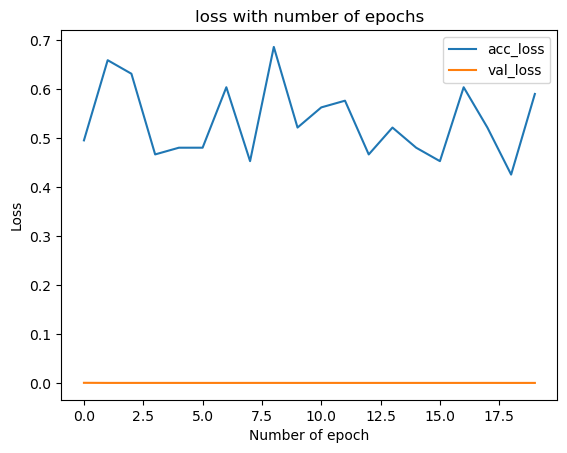

In [15]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare.history['val_loss'])
pllt.title('loss with number of epochs')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['acc_loss', 'val_loss'])
pllt.show()

### Plotting graph for training accuracy and validation accuracy

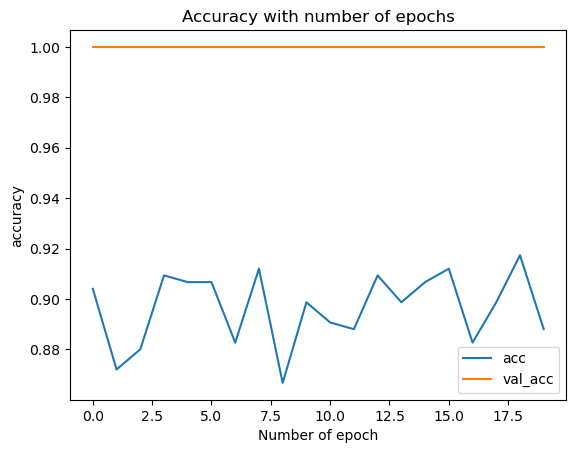

In [16]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['accuracy'])
pllt.plot(plot_compare.history['val_accuracy'])
pllt.title('Accuracy with number of epochs')
pllt.ylabel('accuracy')
pllt.xlabel('Number of epoch')
pllt.legend(['acc', 'val_acc'])
pllt.show()